In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import preproc

In [2]:
train = pd.read_csv('price_train.tsv', sep='\t')
house = pd.read_csv('price_housebase.tsv', sep='\t')

In [16]:
train['month'] = pd.to_datetime(train.month)
train.head(1)

,apartment_ratio,offers_in_sites_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio
0,0.0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0


In [5]:
house['latlon'] = list(zip(house.latitude.values, house.longitude.values))

In [6]:
house.head(1)

,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,building_type,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,...,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey,latlon
0,36.0,3031030817531317628,0,45.0,0,55.705219,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 3",18.0,...,0,16.0,False,37.656994,0.0,True,38.0,1937,120310101302011,"(55.70521926879883, 37.6569938659668)"


In [7]:
preproc.dist_to_center(house.latlon)

,angle,dist
0,208.609050,5.662364
1,208.592932,5.708018
2,209.068190,5.747173
3,46.520739,8.484255
4,47.252273,8.448343
...,...,...
112198,229.115474,49.273623
112199,201.878450,75.988917
112200,187.834313,1.904622
112201,148.526656,8.873159


In [314]:
preproc.closest_tube(house.latlon)

KeyboardInterrupt: 

In [315]:
train

,apartment_ratio,offers_in_sites_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio
0,0.0,0.0,1,22727.273438,2018-02-01,1,0.000000,120132230303223,22727.273438,0.0,0.000000,44.000000,0.0,1,1.000000
1,0.0,0.0,1,22727.273438,2018-03-01,1,0.000000,120132230303223,22727.273438,0.0,0.000000,44.000000,0.0,1,1.000000
2,0.0,0.0,1,43478.261719,2018-06-01,1,0.000000,120132230332230,43478.261719,0.0,1.000000,34.500000,0.0,1,0.000000
3,0.0,0.0,1,43478.261719,2018-07-01,1,0.000000,120132230332230,43478.261719,0.0,1.000000,34.500000,0.0,1,0.000000
4,0.0,0.0,1,36250.000000,2017-01-01,1,1.000000,120132231322113,35714.285156,0.0,0.000000,56.000000,0.0,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166022,0.0,0.0,9,18744.729749,2019-04-01,1,0.052632,120311020100310,18478.261719,0.0,0.052632,46.421053,0.0,19,0.894737
166023,0.0,0.0,9,19055.593378,2019-05-01,1,0.047619,120311020100310,18750.000000,0.0,0.047619,46.309524,0.0,21,0.904762
166024,0.0,0.0,9,19081.275263,2019-06-01,1,0.043478,120311020100310,18750.000000,0.0,0.043478,45.995652,0.0,23,0.913043
166025,0.0,0.0,10,19047.505127,2019-07-01,1,0.041667,120311020100310,18614.130859,0.0,0.041667,45.933333,0.0,24,0.916667


In [326]:
def kill_outlier_prices(train):
    res = train.groupby("city_quadkey").avg_price_sqm.quantile([0.03, 0.97]).unstack(level=1)
    mask = (res.loc[train.city_quadkey, 0.03] <= train.avg_price_sqm.values) & (
        train.avg_price_sqm.values <= res.loc[train.city_quadkey, 0.97])
    return train.loc[mask.values]

In [327]:
train = kill_outlier_prices(train)

In [287]:
y = train.apartment_ratio
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

for column in train.columns[1:]:
    
    y = train[column]
    mask = y.between(y.quantile(.01), y.quantile(.99))
    removed_outliers &= mask
    
    print(column, mask.size - mask.sum())

removed_outliers.value_counts()

offers_in_sites_ratio 0
unique_active_buildings_count 1475
avg_price_sqm 3295
month 0
unique_active_building_series_count 787
rooms_offered_3_ratio 0
city_quadkey 3313
median_price_sqm 3322
rooms_offered_4_more_ratio 1661
rooms_offered_1_ratio 0
total_area_avg 3131
studio_ratio 1669
offer_count 1655
rooms_offered_2_ratio 0


True     146201
False     19826
Name: apartment_ratio, dtype: int64

In [58]:
val = pd.read_csv('val.tsv', sep='\t')
val['month'] = pd.to_datetime(val.month)

In [328]:
from scipy.linalg import inv
from datetime import timedelta


def regression(X, y):
    A = (X - pd.to_datetime('2017-01-01')).apply(lambda x: x.days).values
    A = np.hstack([A.reshape(-1, 1) ** 0, A.reshape(-1, 1), A.reshape(-1, 1) ** 1.3]).astype(float)
    w = inv(A.T @ A + 0.1 * np.eye(A.shape[1])) @ A.T @ y.values.reshape(-1, 1)
    return w

def plot_prices(cnt=5):
    numbers = np.unique(train.city_quadkey.values)
    for i in range(cnt):
        key = np.random.choice(numbers)
        
        df = train.groupby('city_quadkey').get_group(key)
        try:
            df_val = val.groupby('city_quadkey').get_group(key)
            x, y = df.month, df.avg_price_sqm

            x_reg = list(range(0, 365 * 3, 30))
            X = np.array([x_reg]).reshape(-1, 1)

            w = regression(x, y)

            X = np.hstack([X ** 0, X, X ** 1.3]).astype(float)

            x = x.append(df_val.month)
            y = y.append(df_val.avg_price_sqm)

            to_time = lambda t : [pd.to_datetime('2017-01-01') + timedelta(x) for x in t]



            plt.axvline(x=pd.to_datetime('2019-08-15'), ymin=0, ymax=y.max())
            plt.scatter(x, y)
            plt.plot(to_time(x_reg), X @ w)
        except:
            pass

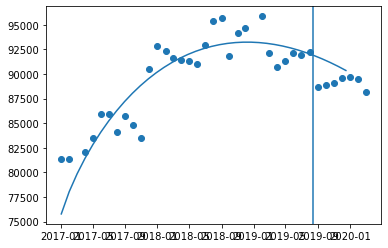

In [347]:
plot_prices(3)